<a href="https://colab.research.google.com/github/JoseManu96/harvest_features/blob/main/dh_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we read the datasets, using pandas.

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

cultivation = pd.read_csv('cultivations.csv')
cultivation.drop( columns = ['Unnamed: 0'], inplace = True)
cultivation.head()


,created_at,cultivation_id,cultivation_name,harvest date,grow start date,yield
0,2020-10-26 21:20:04.316752,18902,A,2020-05-23 00:00:00.000000,04/04/19,52.4
1,2020-10-26 21:20:09.122294,18932,B,2020-02-06 00:00:00.000000,11/14/18,138.5
2,2020-10-26 21:20:21.627212,19009,C,2020-05-19 00:00:00.000000,2019-03-16 00:00:00.000000,72.6
3,2020-10-26 21:20:25.007851,19030,D,2020-02-27 00:00:00.000000,2018-12-12 00:00:00.000000,103.6
4,2020-10-26 21:20:40.866737,19129,E,2020-01-07 00:00:00.000000,2018-10-08 00:00:00.000000,141.0


In [203]:
weather = pd.read_csv('weather.csv')
weather.drop( columns = ['Unnamed: 0'], inplace = True)
weather.head()

,observation_date,weather_data,cultivation_id
0,2018-08-17 04:00:00.000000,"{'et': 5.000000000000001, 'prcp': 0.0, 'tmax':...",1912
1,2018-08-16 04:00:00.000000,"{'et': 4.8900000000000015, 'prcp': 50.73, 'tma...",1912
2,2018-08-15 04:00:00.000000,"{'et': 4.380000000000001, 'prcp': 37.83, 'tmax...",1912
3,2018-08-14 04:00:00.000000,"{'et': 4.05, 'prcp': 4.41, 'tmax': 35.9, 'tmin...",1912
4,2018-08-13 04:00:00.000000,"{'et': 4.81, 'prcp': 0.77, 'tmax': 34.7, 'tmin...",1912


In [204]:
msavi_mean = pd.read_csv('msavi_mean.csv')
msavi_mean.drop( columns = ['Unnamed: 0'], inplace = True)
msavi_mean.head()

,observation_date,meta_data,cultivation_id,data_value
0,2019-10-23 16:06:02.085467,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN
1,2020-06-27 16:15:56.338923,"{'pixel_count': 3636, 'unmasked_count': 3636.0...",18932,0.63542
2,2019-10-23 16:06:02.085467,"{'pixel_count': 1546, 'unmasked_count': 0.0, '...",19009,NaN
3,2020-06-02 16:16:00.038355,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN
4,2019-10-23 16:06:02.085467,"{'pixel_count': 3356, 'unmasked_count': 0.0, '...",19030,NaN


Missing values analysis

In [205]:
cultivation.isna().sum().sum()

0

In [206]:
weather.isna().sum().sum()

0

In [207]:
msavi_mean.isna().sum().sum()

741

We know that msavi_mean has missing values, let's take a look to the number of missing values per columns

In [208]:
msavi_mean['observation_date'].isna().sum()

0

In [209]:
msavi_mean['meta_data'].isna().sum()

0

In [210]:
msavi_mean['cultivation_id'].isna().sum()

0

In [211]:
msavi_mean['data_value'].isna().sum()

741

The column "data_value" is the one who has the missing values. The next thing to do is replace that missing values or remove them 

In [212]:
# We replace the nan values with the meadian

msavi_mean = msavi_mean.fillna(msavi_mean.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [213]:
msavi_mean['data_value']

0       0.451015
1       0.635420
2       0.451015
3       0.451015
4       0.451015
          ...   
2671    0.080866
2672    0.451015
2673    0.451015
2674    0.451015
2675    0.451015
Name: data_value, Length: 2676, dtype: float64

Label encoding

In [214]:
# converting type of columns to 'category'
cultivation['cultivation_name'] = cultivation['cultivation_name'].astype('category')

# Assigning numerical values and storing in another column
cultivation['cultivation_name_cat'] = cultivation['cultivation_name'].cat.codes
cultivation.drop( columns = ['cultivation_name'], inplace = True)
cultivation

# The previus step assign numbers to letters, for example: 0 = A, 1 = B, ...

,created_at,cultivation_id,harvest date,grow start date,yield,cultivation_name_cat
0,2020-10-26 21:20:04.316752,18902,2020-05-23 00:00:00.000000,04/04/19,52.4,0
1,2020-10-26 21:20:09.122294,18932,2020-02-06 00:00:00.000000,11/14/18,138.5,1
2,2020-10-26 21:20:21.627212,19009,2020-05-19 00:00:00.000000,2019-03-16 00:00:00.000000,72.6,2
3,2020-10-26 21:20:25.007851,19030,2020-02-27 00:00:00.000000,2018-12-12 00:00:00.000000,103.6,3
4,2020-10-26 21:20:40.866737,19129,2020-01-07 00:00:00.000000,2018-10-08 00:00:00.000000,141.0,4


Date and time extraction.

In [215]:
# Now we convert the columns with date and time to a datatime object
# and then we extract the info obtaining new features :

def date_time(df,col_name, new_name):
  df[col_name] = pd.to_datetime(df[col_name])
  df[new_name + '_day'] = df[col_name].dt.day
  df[new_name + '_month'] = df[col_name].dt.month
  df[new_name + '_year'] = df[col_name].dt.year
  df[new_name + '_hour'] = df[col_name].dt.hour
  df[new_name + '_minute'] = df[col_name].dt.minute
  df[new_name + '_second'] = df[col_name].dt.second
  df[col_name] = df[col_name].dt.date
  return df


In [216]:
date_time(cultivation,'created_at', 'creation')
date_time(cultivation,'harvest date', 'harvest')
date_time(cultivation,'grow start date', 'grow start')

,created_at,cultivation_id,harvest date,grow start date,yield,cultivation_name_cat,creation_day,creation_month,creation_year,creation_hour,...,harvest_year,harvest_hour,harvest_minute,harvest_second,grow start_day,grow start_month,grow start_year,grow start_hour,grow start_minute,grow start_second
0,2020-10-26,18902,2020-05-23,2019-04-04,52.4,0,26,10,2020,21,...,2020,0,0,0,4,4,2019,0,0,0
1,2020-10-26,18932,2020-02-06,2018-11-14,138.5,1,26,10,2020,21,...,2020,0,0,0,14,11,2018,0,0,0
2,2020-10-26,19009,2020-05-19,2019-03-16,72.6,2,26,10,2020,21,...,2020,0,0,0,16,3,2019,0,0,0
3,2020-10-26,19030,2020-02-27,2018-12-12,103.6,3,26,10,2020,21,...,2020,0,0,0,12,12,2018,0,0,0
4,2020-10-26,19129,2020-01-07,2018-10-08,141.0,4,26,10,2020,21,...,2020,0,0,0,8,10,2018,0,0,0


In [217]:
date_time(weather, 'observation_date','observation' )

,observation_date,weather_data,cultivation_id,observation_day,observation_month,observation_year,observation_hour,observation_minute,observation_second
0,2018-08-17,"{'et': 5.000000000000001, 'prcp': 0.0, 'tmax':...",1912,17,8,2018,4,0,0
1,2018-08-16,"{'et': 4.8900000000000015, 'prcp': 50.73, 'tma...",1912,16,8,2018,4,0,0
2,2018-08-15,"{'et': 4.380000000000001, 'prcp': 37.83, 'tmax...",1912,15,8,2018,4,0,0
3,2018-08-14,"{'et': 4.05, 'prcp': 4.41, 'tmax': 35.9, 'tmin...",1912,14,8,2018,4,0,0
4,2018-08-13,"{'et': 4.81, 'prcp': 0.77, 'tmax': 34.7, 'tmin...",1912,13,8,2018,4,0,0
...,...,...,...,...,...,...,...,...,...
6669,2018-09-19,"{'et': 4.55, 'prcp': 0.0, 'tmax': 35.9, 'tmin'...",19030,19,9,2018,4,0,0
6670,2018-09-18,"{'et': 4.120000000000001, 'prcp': 0.0, 'tmax':...",19030,18,9,2018,4,0,0
6671,2018-09-17,"{'et': 4.2200000000000015, 'prcp': 1.569999999...",19030,17,9,2018,4,0,0
6672,2018-09-16,"{'et': 4.37, 'prcp': 0.0, 'tmax': 34.7, 'tmin'...",19030,16,9,2018,4,0,0


In [218]:
date_time(msavi_mean, 'observation_date','observation' )

,observation_date,meta_data,cultivation_id,data_value,observation_day,observation_month,observation_year,observation_hour,observation_minute,observation_second
0,2019-10-23,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,0.451015,23,10,2019,16,6,2
1,2020-06-27,"{'pixel_count': 3636, 'unmasked_count': 3636.0...",18932,0.635420,27,6,2020,16,15,56
2,2019-10-23,"{'pixel_count': 1546, 'unmasked_count': 0.0, '...",19009,0.451015,23,10,2019,16,6,2
3,2020-06-02,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,0.451015,2,6,2020,16,16,0
4,2019-10-23,"{'pixel_count': 3356, 'unmasked_count': 0.0, '...",19030,0.451015,23,10,2019,16,6,2
...,...,...,...,...,...,...,...,...,...,...
2671,2018-02-20,"{'pixel_count': 1323, 'unmasked_count': 1323.0...",1912,0.080866,20,2,2018,16,5,8
2672,2018-03-07,"{'pixel_count': 1323, 'unmasked_count': 0.0, '...",1912,0.451015,7,3,2018,16,5,1
2673,2018-06-05,"{'pixel_count': 1323, 'unmasked_count': 0.0, '...",1912,0.451015,5,6,2018,16,5,8
2674,2018-04-21,"{'pixel_count': 1323, 'unmasked_count': 0.0, '...",1912,0.451015,21,4,2018,16,5,13


Feature Split

In [219]:
# We define a function that will parse an string and then return the values:

def parse(text, key):
  Dict = eval(text)
  return Dict[key]


In [220]:
# Weather dataset:

weather['et'] = weather['weather_data'].apply(parse, key='et')
weather['prcp'] = weather['weather_data'].apply(parse, key='prcp')
weather['tmax'] = weather['weather_data'].apply(parse, key='tmax')
weather['tmin'] = weather['weather_data'].apply(parse, key='tmin')
weather['gdd12'] = weather['weather_data'].apply(parse, key='gdd12')
weather['smi_5'] = weather['weather_data'].apply(parse, key='smi_5')
weather['smi_15'] = weather['weather_data'].apply(parse, key='smi_15')
weather['smi_50'] = weather['weather_data'].apply(parse, key='smi_50')
weather.drop( columns = ['weather_data'], inplace = True)

In [221]:
# Msavi_mean dataset:

msavi_mean['pixel_count'] = msavi_mean['meta_data'].apply(parse, key='pixel_count')
msavi_mean['unmasked_count'] = msavi_mean['meta_data'].apply(parse, key='unmasked_count')
msavi_mean['unmasked_fraction'] = msavi_mean['meta_data'].apply(parse, key='unmasked_fraction')
msavi_mean.drop( columns = ['meta_data'], inplace = True)

We join the datasets

In [222]:
cultivation['cultivation_id'].unique()

array([18902, 18932, 19009, 19030, 19129])

In [223]:
weather['cultivation_id'].unique()

array([ 1912, 18902, 18932, 19009, 19030])

In [224]:
msavi_mean['cultivation_id'].unique()

array([18902, 18932, 19009, 19030,  1912])

In [225]:
weather.loc[weather.cultivation_id == 1912, 'cultivation_id'] = 19129

In [226]:
msavi_mean.loc[msavi_mean.cultivation_id == 1912, 'cultivation_id'] = 19129

In [227]:
inner_merged = pd.merge(cultivation, weather, on=['cultivation_id'])
inner_merged.shape


(6674, 39)

In [256]:
inner_merged2 = pd.merge(inner_merged, msavi_mean, on=['observation_date', 'cultivation_id'])
inner_merged2.shape

(2676, 49)

In [257]:
inner_merged2.drop_duplicates(inplace = True)

In [258]:
inner_merged2.drop( columns = ['created_at','harvest date','grow start date', 'observation_date','observation_day_y', 'observation_month_y', 'observation_year_y'], inplace = True)

In [259]:
inner_merged2.columns

Index(['cultivation_id', 'yield', 'cultivation_name_cat', 'creation_day',
       'creation_month', 'creation_year', 'creation_hour', 'creation_minute',
       'creation_second', 'harvest_day', 'harvest_month', 'harvest_year',
       'harvest_hour', 'harvest_minute', 'harvest_second', 'grow start_day',
       'grow start_month', 'grow start_year', 'grow start_hour',
       'grow start_minute', 'grow start_second', 'observation_day_x',
       'observation_month_x', 'observation_year_x', 'observation_hour_x',
       'observation_minute_x', 'observation_second_x', 'et', 'prcp', 'tmax',
       'tmin', 'gdd12', 'smi_5', 'smi_15', 'smi_50', 'data_value',
       'observation_hour_y', 'observation_minute_y', 'observation_second_y',
       'pixel_count', 'unmasked_count', 'unmasked_fraction'],
      dtype='object')

In [260]:
# We need to rename some columns after the merge:

inner_merged2 = inner_merged2.rename(columns = {'observation_day_x': 'observation_day', 'observation_month_x':'observation_month', 'observation_year_x':'observation_year', 'observation_hour_x':'observation_hour_weather',
       'observation_minute_x':'observation_minute_weather', 'observation_second_x':'observation_second_weather', 'observation_hour_y':'observation_hour_msavi', 'observation_minute_y':'observation_minute_msavi', 'observation_second_y':'observation_second_msavi'})

In [261]:
inner_merged2.columns

Index(['cultivation_id', 'yield', 'cultivation_name_cat', 'creation_day',
       'creation_month', 'creation_year', 'creation_hour', 'creation_minute',
       'creation_second', 'harvest_day', 'harvest_month', 'harvest_year',
       'harvest_hour', 'harvest_minute', 'harvest_second', 'grow start_day',
       'grow start_month', 'grow start_year', 'grow start_hour',
       'grow start_minute', 'grow start_second', 'observation_day',
       'observation_month', 'observation_year', 'observation_hour_weather',
       'observation_minute_weather', 'observation_second_weather', 'et',
       'prcp', 'tmax', 'tmin', 'gdd12', 'smi_5', 'smi_15', 'smi_50',
       'data_value', 'observation_hour_msavi', 'observation_minute_msavi',
       'observation_second_msavi', 'pixel_count', 'unmasked_count',
       'unmasked_fraction'],
      dtype='object')

In [262]:
# This hour is PM (observation_hour_msavi) so we convert it into military hour adding up 12 hrs:

inner_merged2['observation_hour_msavi'] = inner_merged2['observation_hour_msavi'] + 12

Feature Selection

In [315]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train = inner_merged2[[ 'et',
       'prcp', 'tmax', 'tmin', 'gdd12', 'smi_5', 'smi_15', 'smi_50',
       'data_value', 'pixel_count', 'unmasked_count',
       'unmasked_fraction']]
y_train = inner_merged2['yield']

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)


In [321]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X_train_scaled, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 9.07117
Feature: 1, Score: 0.46598
Feature: 2, Score: -15.56255
Feature: 3, Score: 12.20063
Feature: 4, Score: -2.44748
Feature: 5, Score: -1.13965
Feature: 6, Score: -4.80087
Feature: 7, Score: 0.68832
Feature: 8, Score: -2.00037
Feature: 9, Score: 17.22180
Feature: 10, Score: -2.14246
Feature: 11, Score: 1.37067


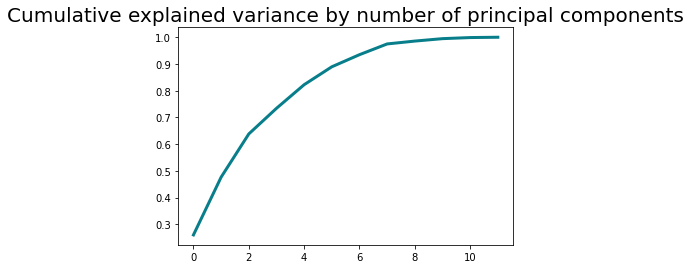

In [326]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

The algorithms above tell us that 6 variables describe 90% of the variance of the data. Furthermore linear regression tells us that these 6 variables are: 'et', 'prcp', 'tmin', 'smi_50', 'pixel_count' and 'unmasked_fraction'. In addition to these we consider that the variables referring to the date and time, these would be harvest_date, grow_start_date, and observation_date.

Let us remember that the variables that have date and time, were separated into 6 variables, therefore the total of relevant features would be 27. These would finally be: 'cultivation_id', 'harvest_month', 'harvest_year', 'harvest_hour', 'harvest_minute', 'harvest_second', 'grow start_day', 'grow start_month', 'grow start_year', 'grow start_hour', 'grow start_minute', 'grow start_second', 'observation_day', 'observation_month', 'observation_year', 'observation_hour_weather', 'observation_minute_weather', 'observation_second_weather', 'et', 'prcp', 'tmin', 'smi_50', 'observation_hour_msavi', 'observation_minute_msavi', 'observation_second_msavi', 'pixel_count',
       'unmasked_fraction'.

To test the value of these features further on a larger data set, the most common is to check the significance of the variables. For this, the p-value is used, in particular if the conditions exist to perform linear regression or generalized linear regression, a p-value of a feature less than 0.05, tells us that these feauture is statistically significant. Therefore, it would suffice to check that the features that we recommend taking into account are indeed statistically significant.

Another methodology could be through stratified sampling, ensuring that the largest sample is correctly represented within the sample that was analyzed. This ensures statistical significance and accurately reflect the population being studied, so the analysis of significance that we made previously should lead to a correct conclusion.

Some interesting functions with the features would be given the 'grow_start_date' and 'Harvest_date', determining the characteristics of the weather in this time interval, as well as the 'meta_data'. These values ​​can be given in intervals, and they could provide a reference on the expected yield based on the weather information and the collection of satellite images. In this way, the producers will have an expected yield margin, by verifying that the weather or terrain conditions, which have been registered by other producers, are met.

On the other hand, to do forecasting, given that the harvests are made between seasons, it can be taken into account for future predictions, in addition to algorithms based on decision trees, algorithms such as seasonal autoregressive integrated moving average (SARIMA), taking advantage of seasonality.